<a href="https://colab.research.google.com/github/Marya373/Skillbox/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%222023_05_Python_%D0%B4%D0%BB%D1%8F_%D1%84%D1%80%D0%B8%D0%BB%D0%B0%D0%BD%D1%81%D0%B5%D1%80%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Программа интенсива
**1 день**: учимся работать с API и собираем данные о вакансиях в таблицу

**2 день**: делаем продвинутую аналитику (Data Mining) с помощью методов NLP

**3 день**: автоматизируем рутинные задачи - учимся отправлять данные по email

<img src='https://drive.google.com/uc?export=view&id=1dPn3lqw2RD2QVJvxyLKI1sFJ2Q_Fc61I' height=350 border='0' alt='1 день: учимся работать с API и собираем данные о вакансиях в таблицу. 2 день: делаем продвинутую аналитику (Data Mining) с помощью методов NLP. 3 день: автоматизируем рутинные задачи - учимся отправлять данные по email'>

[Ссылка](https://colab.research.google.com/drive/1zTxohoOF1eLatEJXT9zsKwM6E0LCOfuA?usp=sharing) на незаполненную рабочую тетрадь


# 1 день: учимся работать с API и собираем данные о вакансиях в таблицу

[Презентация - День 1](https://docs.google.com/presentation/d/1R4lj_CadeV0G8CZLUfA2byHht0bhWR_5dmSLcX9ATqY/edit?usp=sharing)

Запись эфира: [Что умеет Python-фрилансер. Учимся собирать информацию в интернете](https://live.skillbox.ru/webinars/code/chto-umeet-python-frilanser-uchimsya-sobirat-informaciyu-v-internete150523/)

## Сначала посмотрим на результат

100%|██████████| 19/19 [00:19<00:00,  1.02s/it]


Загружено 2000 вакансий
Топ навыков Python-разработчика:


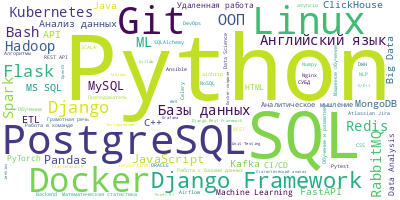

In [ ]:
import time
import json
import requests
from IPython.display import display, clear_output
import tqdm

import pandas as pd
from collections import Counter
from wordcloud import WordCloud


def dump_json(obj, filename):
    """Функция сохранения JSON-файла на диск"""
    with open(filename, 'w', encoding='UTF-8') as f:
        json.dump(obj, f, ensure_ascii=False, indent=4)


def get_vacancies(text="python", 
                  experience=None, employment=None, schedule=None):
    """Функция для скачивания данных по API HeadHunter"""
    params = {
            "per_page": 100,
            "page": 0,
            "period": 30,
            "text": text,
            "experience": experience,
            "employment": employment,
            "schedule": schedule,
        }

    res = requests.get("https://api.hh.ru/vacancies", params=params)
    if not res.ok:
        print('Error:', res)
    vacancies = res.json()["items"]
    pages = res.json()['pages']

    for page in tqdm.trange(1, pages):
        params['page'] = page
        res = requests.get("https://api.hh.ru/vacancies", params=params)
        if res.ok:
            response_json = res.json()
            vacancies.extend(response_json["items"])
        else:
            print(res)
    
    dump_json(vacancies, 'vacancies.json')

    return vacancies


def get_full_descriptions(vacancies):
    """Функция для скачивания полного описания вакансий (работает 20 минут!)"""
    vacancies_full = []
    for entry in tqdm.tqdm(vacancies):
        vacancy_id = entry['id']
        description = requests.get(f"https://api.hh.ru/vacancies/{vacancy_id}")
        vacancies_full.append(description.json())
        print(description.json())
        time.sleep(0.2)
        clear_output()

    dump_json(vacancies_full, 'vacancies_full.json')

    return vacancies_full


def load_from_google_drive(file_id, filename):
    """Функция для загрузки уже скаченного файла вместо get_full_descriptions"""
    url = f"https://drive.google.com/uc?export=view&id={file_id}"
    res = requests.get(url)
    data = res.json()
    dump_json(data, filename)
    return data


vacancies = get_vacancies()
print('Загружено', len(vacancies), 'вакансий')


# vacancies_full = get_full_descriptions(vacancies)  # Выполняется ≈20 мин
vacancies_full = load_from_google_drive('1d2NfxfM2n48m5WS6oCCc3rcQ4hdnTQ1v',
                                        'vacancies_full.json')

all_skills = []
for vacancy in vacancies_full:
    for skill in vacancy['key_skills']:
        all_skills.append(skill['name'])

frequencies = Counter(all_skills)

pd.DataFrame(vacancies).to_excel('Cписок вакансий.xlsx')
pd.DataFrame(vacancies_full).to_excel('Подробное описание вакансий.xlsx')

print('Топ навыков Python-разработчика:')
cloud = WordCloud(background_color="white")
cloud.generate_from_frequencies(frequencies=frequencies).to_image().show()

## 0 Справка по Python

📝 **Переменная** - место в памяти, в котором хранятся данные и которому дали имя (аналог `x`, `y`, `V_куба` в школьных формулах)

📝 **Текст** - тип данных, обозначающий пользовательский текст. Чтобы отделяться от названий перееменных и функций, заключается в кавычки.

Напр. `welcome_message = "Hello"`

📝 **Число** - числовой тип данных. Обозначение как в калькуляторах без кавычек: `2 + 2`. Десятичная часть записывается через точку: `3.1415`. 

📝 **True/False** - бинарный или булевый тип (bool) тип данных, имеющий 2 значения: истина (`True`) или ложь (`False`). Применяется, например, в выражениях сравнения: `1 > 3 вернет False`, `1 in [0, 1, 2, 3] вернет True`.

📝 **None** - тип данных "ничто", имеющий единственное значение. Нужен как заглушка в тех местах, где значение явно не указано. Например, `[{'employer': 1, 'remote': True}, {'employer': 2, 'remote': None}]` - первый работодатель указал, что удаленка возможна, а второй - не указал ничего.


In [ ]:
welcome_message = 'Hello'

In [ ]:
2 + 2 > 4

In [ ]:
remote = None

📝 **Список** - структура данных, в которой может хранится много значений. Значения записываются через запятую в квадратных скобках.

Напр. `['Python-разработчик', 6]`

Ключевые методы: 
* `<имя переменной-списка>.append(<один элемент>)` - добавить в конец списка один элемент
* `<имя переменной-списка>.extend(<другой список>)` - последовательно добавить все элементы из другого списка в исходный

Мы можем считывать и перезаписывать элементы **индексу** - номеру от начала: `skills[0] = 'стрессоустойчивость'` (нумерация с 0).

📝 **Словарь** - структура данных, в которых значения хранятся по **ключу**. Записываются как пары `ключ: значение` через запятую в фигурных скобках.

Напр. `{'profession': 'Python-разработчик', 'months': 6}`.

Мы можем считывать и перезаписывать элементы по *ключу*: `course['profession'] = 'Python Developer'`

Типы данных могут комбинироваться как угодно: список словарей с вложенными списками словарей...

### ✍ Упражнения на типы данных

1. Создайте список с любыми 5 навыками, которые указаны в картинке с облаком ключевых слов в первой ячейке (Python, Django, SQL, PostgreSQL, Flask, Linux, и т.д.). Помним про то, что название навыка - это текст, поэтому он должен заключаться в кавычки.

 Выведите на экран нулевой, второй и последний элемент списка.

2. Создайте словарь `jobs` следующей структуры и выведите на экран: 
  * ключ - `"навык"`, значение - `"Python"`
  * ключ - `"удаленка"`, значение - `None`

  Следующей командой перезапишите для ключа `"удаленка"` значение с `None` на `True` (доступ к значению по ключу - через квадратные скобки) и выведите новую версию словаря на экран.

3. 💪 (Задание со \*) Создайте список из трех словарей:
  * каждый словарь содержит ключ `'id'`, который последовательно увеличивается от 1 до 3 (цифры никаких кавычек не требуют)
  * каждый словарь содержит ключ `'skills'`, который содержит список навыков любой длины, включая пустой список (пустой список обозначается `[]`)
  * каждый словарь содержит ключ `'area'`, который сам является словарем с ключами: `'name'` - название города и `'remote'` - возможность удаленки (может принимать 3 значения: `True`, `False` или None).

  Из получившегося объекта выведите название города в последнем элементе, а также первый навык нулевого элемента.

## 1 Работа с API, формат JSON

📝 **JSON** (JavaScript Object Notation) - текстовый формат хранения данных в виде словарей и списков.

Запись почти не отличается от словарей и списков в Python.

```json
[
    {"id": 123, 
     "key_skills": [
        {"name": "Python"}, 
        {"name": "SQL"}]
    },
    {"id": 345, 
     "key_skills": [
        {"name": "Web"}]
    },
]
```

### 1.1 Для работы с API используем библиотеку requests

📝 Мы можем использовать функции за пределами стандартной бибилотеки - для этого мы **подключаем пакеты**

У запроса есть следующие компоненты:
* URL - адрес для запроса
* params - параметры для поиска данных
* header - заголовок (например, данные для авторизации)

Возвращается: ответ HTTP (например, 200 Ok) + данные. Наиболее распространена передача данных в формате JSON.

Описание методов API сайта HH.ru: https://github.com/hhru/api/blob/master/docs/vacancies.md#search

Ограничения API:
* Не более 2000 вакансий
* Не более 30 дней

In [ ]:
# Подключаем библиотеку

In [ ]:
# Пример запроса, не требующего авторизации: 'http://api.hh.ru/vacancies'

📝 **Функция** - набор команд, которые объединили под одним именем и дали возможность заменять параметры

* `def` - ключевое слово, которое говорит, что далее идет объявление функции
* Название придумываем сами (главное, чтобы начиналось с буквы или с _)
* В скобках указываем параметры через запятую. Можно указать значение по умолчанию через равно.
* После скобок - двоеточие
* Мы понимаем, где начало и конец функции по отступам в начале строки
* (опционально) Функция может вернуть значение с помощью ключевого слова `return`

In [ ]:
# Пример: функция add на вход получает 2 числа a и b и возвращает их сумму


📝 Ключевое слово **with** позволяет открывать и автоматически закрывать файлы

In [ ]:
# Напишем функцию для сохранения файла в формате JSON на диск

### 1.2 Напишем функцию для загрузки вакансий за месяц

📝 Ключевое слово **for** говорит буквально "для каждого элемента из списка выполнить набор действий"

* После выражения `for ... in ...` ставится двоеточие
* Границы набора команд как в случае с функцией определяются по отступу в начале строки

In [ ]:
# Пример: для каждого элемента (назовем item) из списка [1, 2, 3]: умножить на 2 и напечатать результат

📝 Ключевое слово **if** добавляет возможность выбора действия в зависимости от ситуации

Библиотека `tqdm` предоставляет функции для визуализации прогресса

In [ ]:
# Функция для загрузки данных за месяц:


## 2 Загрузим полное описание для каждой вакансии

`vacancies` представляет собой *список словарей*. Для каждого элемента из списка `vacancies` берем ключ `id` и подставляем в запрос `f"https://api.hh.ru/vacancies/{vacancy_id}"`.

Буква `f` перед кавычками обозначает "форматную строку", которая позволяет подставить значение в фигурных скобках.

| Берем id  |  | Получаем набор запросов | 
| -------- | ----------- | -----------|
| `[{'id': 1},`<br>`{'id': 2},`<br>` {'id': 3}]` | → | `https://api.hh.ru/vacancies/1`<br>`https://api.hh.ru/vacancies/2`<br>`https://api.hh.ru/vacancies/3` |

При запуске 2000 последовательных запросов вскоре сайт начнет запрашивать капчу и вместо результата возвращать ошибку HTTP 403 Forbidden.

Это можно обойти, поставив небольшой таймаут (функция `time.sleep`) хотя бы на 0.2 секунды. В этом случае запрос будет выполняться примерно 20 минут. Чтобы сэкономить себе время - загрузим уже подготовленные данные.

Как был получен id файла на Google Drive:

Щелчок правой кнопкой мыши → "Открыть доступ" либо "Получить ссылку" → Вместо "Доступ ограничен" выбрать "Все, у кого есть ссылка" → "Копировать ссылку" → "Готово"

id файла - это длинная последовательность символов между `file/d/` и `/view?usp=sharing`:

drive.google.com/file/d/**1d2NfxfM2n48m5WS6oCCc3rcQ4hdnTQ1v**/view?usp=sharing

In [ ]:
vacancies_full 

## 3 Посчитаем частоты упоминания навыков



| Список словарей |  | Простой список | 
| -------- | ----------- | -----------|
| `'key_skills' = [{'name': 'Python'},`<br>` {'name': 'Django'},`<br>` {'name': 'asyncio'}]` | → | `['Python', 'Django', 'asyncio']` |

In [ ]:
# Составим список all_skills взяв ключ ['name'] у каждого навыка (skill) 
# каждой вакансии (vacancy) в списке vacancies_full


Посчитаем частоту с помощью функции `Counter` из библиотеки `collections`

Метод `most_common()` отсортирует слова по убыванию

In [ ]:
from collections import Counter

# frequencies = ...

## 4 Визуализируем облако слов

In [ ]:
from wordcloud import WordCloud

# При создании облака задаем цвет фона background_color="white"
# cloud = ...

# Облако слов генерируем из словаря частотности с помощью метода 
# generate_from_frequencies

# Преобразование в картинку и визуализация: .to_image().show()


## 5 Сохраняем данные в виде таблицы

In [ ]:
import pandas as pd

Для работы с таблицами будем использовать объект [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) из библиотеки pandas.

Объект DataFrame можно использовать как словарь, где ключи - названия колонок, а данные хранятся в колонке списком.

Метод `to_excel` сохраняет объект в файл в виде Excel-таблицы.

### ✍ Упражнение на работу с API

Узнайте, **какие параметры для поиска можно задать**, помимо поиска по тексту.

Получите JSON с ответом от метода API https://api.hh.ru/dictionaries и выведите, какие параметры можно задавать для ключей `'experience'`, `'employment'`, `'schedule'`.

Какие еще параметры запроса доступны, можно посмотреть в документации: https://github.com/hhru/api/blob/master/docs/vacancies.md#search

💪 (Задание со \*) **Постройте облако ключевых слов для нового запроса** (для загрузки новых данных не забудьте заменить функцию `load_from_google_drive` на `get_full_descriptions`)

# 2 день: Data Mining

[Презентация - День 2](https://docs.google.com/presentation/d/1nB-yG3DKkRqMHvftTQboM7J9r600VGu5v4QRhjnejjU/edit?usp=sharing)

Data Mining (с англ. буквально «добыча данных») — интеллектуальный анализ данных.

* Извлечение полезной «скрытой» информации из большого объёма данных.

* Структурирование для дальнейшего использования
(например, сохранение в Excel).


Natural Language Processing, NLP — методы обработки естественного языка.

Сегодня мы будем разбирать информацию в поле `'description'` - в описании вакансии

Топ навыков Python-разработчика:


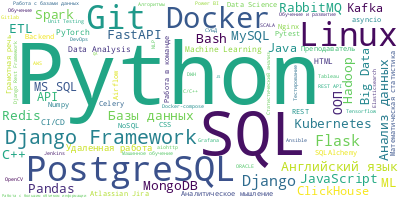

In [ ]:
import time
import json
import requests
from IPython.display import display, clear_output
import tqdm

import pandas as pd
from collections import Counter
from wordcloud import WordCloud


def dump_json(obj, filename):
    """Функция сохранения JSON-файла на диск"""
    with open(filename, 'w', encoding='UTF-8') as f:
        json.dump(obj, f, ensure_ascii=False, indent=4)


def load_from_google_drive(file_id, filename):
    """Функция для загрузки уже скаченного файла вместо get_full_descriptions"""
    url = f"https://drive.google.com/uc?export=view&id={file_id}"
    res = requests.get(url)

    vacancies_full = res.json()

    dump_json(vacancies_full, filename)

    return vacancies_full

# Загрузили сохраненный список вакансий
vacancies_full = load_from_google_drive('1d2NfxfM2n48m5WS6oCCc3rcQ4hdnTQ1v',
                                        'vacancies_full.json')

all_skills = []
for vacancy in vacancies_full:
    for skill in vacancy['key_skills']:
        all_skills.append(skill['name'])

frequencies = Counter(all_skills)

print('Топ навыков Python-разработчика:')
cloud = WordCloud(background_color="white")
cloud.generate_from_frequencies(frequencies=frequencies).to_image().show()

## 1 Выделим данные о вакансиях

In [ ]:
# Создадим таблицу формата vacancies_df из словаря vacancies_full
vacancies_df = ...

С таблицей DataFrame можно работать как со словарем: ключ - название колонки, значение - данные в колонке.

* `vacancies_df['description']` - список значений в колонке description
* `vacancies_df['description'][0]` - как из обычного списка мы можем получить элемент по порядковому номеру (нумерация с нуля)

❗ Сначала **научимся обрабатывать 1 запись**, потом перейдем к обработке всего массива данных

In [ ]:
vacancy = vacancies_df['description'][0]

### ✍ Упражнение (выполните после полного просмотра вебинара) 

Вернитесь к ячейке выше с кодом `vacancy = vacancies_df['description'][0]` и выберите другую запись в таблице (замените 0 на другое число). Посмотрите, как изменится вывод в ячейках при замене входных данных

## 2 Уберем HTML-тэги

<h1><span style="color:#000000; font-family:Arial"><span style="font-size:24px"><strong>HTML - что представляют из себя интернет страницы</strong></span></span></h1>

<p><span style="font-size:16pt"><span style="font-family:Arial"><span style="color:#000000"><strong>HTML</strong></span></span></span><span style="font-size:16pt"><span style="font-family:Arial"><span style="color:#000000"> (HyperText Markup Language) - язык разметки для веб-страниц</span></span></span></p>

<p><span style="font-size:16pt"><span style="font-family:Arial"><span style="color:#000000">Пример: таблицы</span></span></span></p>

<table border="1" cellpadding="1" cellspacing="1" style="width:295px">
   <tbody>
       <tr>
           <td style="width:106px">&lt;table&gt;&lt;/table&gt;</td>
           <td style="width:173px">Заголовок таблицы</td>
       </tr>
       <tr>
           <td style="width:106px">&lt;tr&gt;&lt;/tr&gt;</td>
           <td style="width:173px">Границы строки</td>
       </tr>
       <tr>
           <td style="width:106px">&lt;td&gt;&lt;/td&gt;</td>
           <td style="width:173px">Границы ячейки</td>
       </tr>
   </tbody>
</table>


📝 **Парсинг** (parsing) — выделение значимых элементов из информации (не обязательно с веб-сайтов)

Для работы с HTML можно использовать библиотеку [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [ ]:
import bs4

Очистим тэги, оставив только текст.

`bs4.BeautifulSoup(vacancy)` - "парсит", т.е. разбирает на элементы. `.text` оставляет только текстовое наполнение

In [ ]:
text = ...

## 3 Разберем текст на предложения

Функции для анализа текста и приведения слов к нормальной форме возьмем из natasha. Вначале ее нужно скачать

📝 Знак ! в начале блока кода говорит о том, что мы переходим от кода на Python к командам операционной системы

In [ ]:
!pip install natasha

In [ ]:
from natasha import Doc, MorphVocab, NewsEmbedding, NewsMorphTagger, Segmenter

Наша цель - преобразовать все слова к начальной форме:

`'Компания ищет разработчика для работы над проектом'` → `['компания', 'искать', 'разработчик', 'для', 'работа', 'над', 'проект]`

In [ ]:
#  Сегментация - разбиение на слова и предложения
segmenter = Segmenter()

# Морфологический разбор - генерируются формы слова
embedding = NewsEmbedding()
morph_tagger = NewsMorphTagger(embedding)
morph_vocab = MorphVocab()

# Объект документа (в нашем примере документ = описание одной вакансии)
doc = Doc(text)

Посмотрим, как будет дополняться информация о документе

In [ ]:
doc

Doc(text='UpTrader – продуктовая FinTech компания, мы созда...)

📝 **Токен** - минимальная единица языка, имеющая смысл. Например, слово или число. А буква уже не является токеном,потому что сама по себе буква не несет смысла.

Segmenter разбивает документ на список токенов, и у нас появляется новый атрибут `doc.tokens`

In [ ]:
doc.segment(segmenter)

In [ ]:
doc

Теперь для каждого токена мы можем получить начальную форму

In [ ]:
doc.tag_morph(morph_tagger)

In [ ]:
doc

Для каждого токена в документе делаем преобразование

In [ ]:
words = []
for token in doc.tokens:
    token.lemmatize(morph_vocab)
    normal_form = token.lemma
    print(token.text, '->', normal_form)
    words.append(normal_form)

Собираем текст обратно.

Объединим список элементов в одну строку через пробел:

`['обязанность', 'писать',  'код']` → `'обязанность писать код'`

In [ ]:
# В основе конструкции - текст-разделитель (у нас это символ пробела ' '), из него берем функцию join,
# которая объединяет все слова в списке в одну строку через разделитель
line = ' '.join(words) 

Доработаем код так, чтобы убрать неважные части речи - предлоги, союзы и т.п.

📝 Ключевое слово **if** говорит буквально: если условие выполнено - сверни от основной линии программы в дополнительную ветку кода

* После выражения `if <условие, которое дает True или False>` ставится двоеточие
* Границы набора команд как в случае с функцией и ключевым словом for определяются по отступу в начале строки

Собираем код воедино.

Чтобы убрать ненужные части речи и знаки, ставим условие с помощью оператора if

In [ ]:
def preprocess(text):
    parsed_html = bs4.BeautifulSoup(text)
    text = parsed_html.text # удалили тэги
    
    morph_vocab = MorphVocab()
    segmenter = Segmenter()
    embedding = NewsEmbedding()
    morph_tagger = NewsMorphTagger(embedding)
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    words = []

    for token in doc.tokens:
        # Если часть речи не входит в список: [знак пунктуации, предлог, союз, местоимение], выполняем:
        if token.pos not in ['PUNCT', 'ADP', 'CCONJ', 'PRON']:  
            # Преобразуем к нормальной форме 'способов' -> 'способ'
            token.lemmatize(morph_vocab)
            # Добавляем в общий список 
            words.append(token.lemma)

    # Объединяем список элементов в одну строку через пробел
    # ['обязанность', 'писать',  'код'] -> 'обязанность писать код'
    line = ' '.join(words)

    return line

In [ ]:
# Этот блок кода выполняется порядка получаса, поэтому мы прервем его и скачаем готовый файл
# При остановке вылетит ошибка KeyboardInterrupt - это не важно, пусть эта ячейка 
# остается "забракованной", мы просто начнем выполнять код дальше со следующей ячейки

preprocessed = []

for vacancy in tqdm.notebook.tqdm(vacancies_df['description']):
    preprocessed.append(preprocess(vacancy))

In [ ]:
# Если хотите загрузить собственные файлы - закомментируйте код (поставьте знак # в начале)
preprocessed = load_from_google_drive('14dcZnE_XvVeCgWCDgJSZiHgYJQm-TYvD', 'preprocessed.json')

## 4 Посчитаем наиболее важные слова с помощью TF-IDF

📝 TF-IDF - формула для расчета "веса" слова, в ней набольшее число получат слова, которые встречаются часто в одном документе, но редко - во всех (то есть, слова, являющиеся специфическими для конкретного документа)

$$TF \text{-} IDF(t, d, D) = \dfrac{\text{Сколько раз слово $t$ встретилось в документе $d$}}{\text{Сколько слов в документе $d$}} \cdot 
log \left( \dfrac{\text{Сколько всего документов в $D$}}{\text{Число документов в $D$, в которых встречается слово $t$}} \right),$$

где:
* $t$ — “Терм” = слово или словосочетание
* $d$ — “Документ” = описание одной вакансии
* $D$ — “Коллекция” = набор документов (список вакансий)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
D = [
    "мама мыла раму",  # d - "мама мыла раму", t - "раму"
    "мама мыла посуду",
    "дочка мыла раму"
]

vectorizer = TfidfVectorizer()
#  Обучаем объект векторизатора (функции, кодирующий текст в виде последовательностей чисел)
vectorizer.fit(D)

tf_idf_words = vectorizer.get_feature_names_out()
tf_idf_table = vectorizer.transform(D).toarray()

pd.DataFrame(tf_idf_table, columns=tf_idf_words)

,дочка,мама,мыла,посуду,раму
0,0.000000,0.619805,0.481334,0.000000,0.619805
1,0.000000,0.547832,0.425441,0.720333,0.000000
2,0.720333,0.000000,0.425441,0.000000,0.547832


Мы можем настраивать параметры векторизации - например, выбирать пары слов тоже.

Это делается при создании объекта: `TfidfVectorizer(ngram_range=(1, 2))`

Просуммируем вес слова по всем документам

In [ ]:
weights = tf_idf_table.sum(axis=0)

Отсотируем таблицы в порядке убывания "веса" слова:
* `.argsort()` дает список индексов в порядке возрастания значения
* конструкция `[::-1]` разворачивает список (проходит его с шагом -1)
* получив нужный порядок номеров, выведем в этом порядке ключевые слова

In [ ]:
indices_order = weights.argsort()[::-1]

In [ ]:
tf_idf_words[indices_order]

In [ ]:
# То же самое для коллекции вакансий

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
#  Обучаем объект векторизатора (функции, кодирующий текст в виде последовательностей чисел)
vectorizer.fit(preprocessed)

tf_idf_words = vectorizer.get_feature_names_out()
tf_idf_table = vectorizer.transform(preprocessed).toarray()
weights = tf_idf_table.sum(axis=0)
indices_order = weights.argsort()[::-1]

tf_idf_words[indices_order]

array(['работа', 'опыт', 'разработка', ..., 'methods based',
       'nlp benchmarking', 'of deep'], dtype=object)

Ключевые слова в описании вакансий


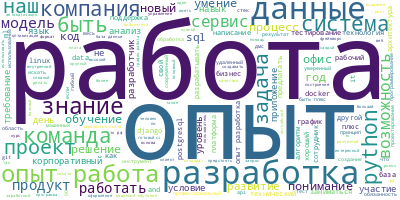

In [ ]:
frequencies = dict(zip(tf_idf_words, weights))

print('Ключевые слова в описании вакансий')
cloud = WordCloud(background_color="white")
cloud.generate_from_frequencies(frequencies=frequencies).to_image().show()

# Домашнее задание

✍ Используя возможности API, **загрузите релевантные для себя вакансии** (настроив параметр опыта, место работы и проч.) и постройте для них облако ключевых слов.

✍ (Творческая задача) **Подумайте, как можно улучшить поиск ключевых слов** (удалять определенные слова, использовать синтаксический разбор и проч.) Запишите идеи в рабочей тетради (текстовое поле создается кнопкой "+ Текст" слева вверху).

### Весь код 2-го дня для удобного запуска

In [ ]:
!pip install natasha --quiet

In [ ]:
import time
import json
import requests
from IPython.display import display, clear_output
import tqdm
import tqdm.notebook

import bs4
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
from natasha import Doc, MorphVocab, NewsEmbedding, NewsMorphTagger, Segmenter
from sklearn.feature_extraction.text import TfidfVectorizer


# Код 1-го дня: загрузка данных из интернета

def dump_json(obj, filename):
    """Функция сохранения JSON-файла на диск"""
    with open(filename, 'w', encoding='UTF-8') as f:
        json.dump(obj, f, ensure_ascii=False, indent=4)


def get_vacancies(text="python", 
                  experience=None, employment=None, schedule=None):
    """Функция для скачивания данных по API HeadHunter"""
    params = {
            "per_page": 100,
            "page": 0,
            "period": 30,
            "text": text,
            "experience": experience,
            "employment": employment,
            "schedule": schedule,
        }

    res = requests.get("https://api.hh.ru/vacancies", params=params)
    if not res.ok:
        print('Error:', res)
    vacancies = res.json()["items"]
    pages = res.json()['pages']

    for page in tqdm.trange(1, pages):
        params['page'] = page
        res = requests.get("https://api.hh.ru/vacancies", params=params)
        if res.ok:
            response_json = res.json()
            vacancies.extend(response_json["items"])
        else:
            print(res)
    
    dump_json(vacancies, 'vacancies.json')

    return vacancies


def get_full_descriptions(vacancies):
    """Функция для скачивания полного описания вакансий (работает 20 минут!)"""
    vacancies_full = []
    for entry in tqdm.tqdm(vacancies):
        vacancy_id = entry['id']
        description = requests.get(f"https://api.hh.ru/vacancies/{vacancy_id}")
        vacancies_full.append(description.json())
        print(description.json())
        time.sleep(0.2) # Этот таймаут нужен, чтобы hh не начал запрашивать капчу
        clear_output()

    dump_json(vacancies_full, 'vacancies_full.json')

    return vacancies_full


def load_from_google_drive(file_id, filename):
    """Функция для загрузки уже скаченного файла вместо get_full_descriptions"""
    url = f"https://drive.google.com/uc?export=view&id={file_id}"
    res = requests.get(url)
    data = res.json()
    dump_json(data, filename)
    return data


vacancies = get_vacancies()
print('Загружено', len(vacancies), 'вакансий')


# vacancies_full = get_full_descriptions(vacancies)  # Выполняется ≈20 мин
vacancies_full = load_from_google_drive('1d2NfxfM2n48m5WS6oCCc3rcQ4hdnTQ1v',
                                        'vacancies_full.json')

all_skills = []
for vacancy in vacancies_full:
    for skill in vacancy['key_skills']:
        all_skills.append(skill['name'])

frequencies = Counter(all_skills)

pd.DataFrame(vacancies).to_excel('Cписок вакансий.xlsx')
pd.DataFrame(vacancies_full).to_excel('Подробное описание вакансий.xlsx')

print('Топ навыков Python-разработчика:')
cloud = WordCloud(background_color="white")
wc_skills = cloud.generate_from_frequencies(frequencies).to_image()
wc_skills.show()
wc_skills.save('word_cloud_skills.png')


# Код 2-го дня: Data Mining - выделение ключевых слов

def preprocess(text):
    """Функция для предварительной обработки текста одной вакансии:
    '<p><strong>Кого мы ищем:</strong><br/>Junior Backend разработчика, готового работать в команде.</p> <p><strong>'
     ↓ ↓ ↓
    'искать junior backend разработчик готовый работать команда'
    """
    parsed_html = bs4.BeautifulSoup(text)
    text = parsed_html.text # удалили тэги
    
    morph_vocab = MorphVocab()
    segmenter = Segmenter()
    embedding = NewsEmbedding()
    morph_tagger = NewsMorphTagger(embedding)
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    words = []

    for token in doc.tokens:
        # Если часть речи не входит в список: [знак пунктуации, предлог, союз, местоимение], выполняем:
        if token.pos not in ['PUNCT', 'ADP', 'CCONJ', 'PRON']:  
            # Преобразуем к нормальной форме 'способов' -> 'способ'
            token.lemmatize(morph_vocab)
            # Добавляем в общий список 
            words.append(token.lemma)

    # Объединяем список элементов в одну строку через пробел
    # ['обязанность', 'писать',  'код'] -> 'обязанность писать код'
    line = ' '.join(words)

    return line

def preprocess_all(document_collection):
    """Функция для обработки всех вакансий. На вход функция получает список с описаниями.
    Работает до получаса!
    """
    preprocessed = []
    for vacancy in tqdm.tqdm(document_collection):
        preprocessed.append(preprocess(vacancy))

    dump_json(preprocessed, 'preprocessed.json')

    return preprocessed

vacancies_df = pd.DataFrame(vacancies_full)
# Этот код выполняется примерно полчаса
# preprocessed = preprocess_all(vacancies_df['description'])

# Вместо этого загрузим обработанные тексты с диска
preprocessed = load_from_google_drive('14dcZnE_XvVeCgWCDgJSZiHgYJQm-TYvD', 'preprocessed.json')


def get_tf_idf_weights(preprocessed):
    """Эта функция получает на вход подготовленные тексты вида 
    'искать junior backend разработчик готовый работать команда'
    и составляет по ним словарь весов ключевых слов: 
    {'искать': 0.54, 'junior': 0.73, ...}
    """
    vectorizer = TfidfVectorizer(ngram_range=(1, 2))
    #  Обучаем объект векторизатора (функции, кодирующий текст в виде последовательностей чисел)
    vectorizer.fit(preprocessed)

    tf_idf_words = vectorizer.get_feature_names_out()
    tf_idf_table = vectorizer.transform(preprocessed).toarray()
    weights = tf_idf_table.sum(axis=0)
    indices_order = weights.argsort()[::-1]

    tf_idf_words[indices_order]

    frequencies = dict(zip(tf_idf_words, weights))

    return frequencies

frequencies = get_tf_idf_weights(preprocessed)

print('\nКлючевые слова в описании вакансий:')
cloud = WordCloud(background_color="white")
wc_descriptions = cloud.generate_from_frequencies(frequencies).to_image()
wc_descriptions.show()
wc_descriptions.save('word_cloud_descriptions.png')

# 3 день: автоматизируем рутину

Сегодня мы будем учиться собирать данные по расписанию и автоматически отправлять их по почте

[Презентация - День 3](https://docs.google.com/presentation/d/1zQHwfERVjyXwz3DtB9K-MDhOnymZwzIJvEgrAdMXXAo/edit?usp=sharing)

Ссылка на эфир: [Автоматизируем рутину с помощью Python](https://live.skillbox.ru/webinars/code/avtomatiziruem-rutinu-s-pomoshyu-python290423/)

In [ ]:
!pip install natasha --quiet

In [ ]:
import time
import json
import requests
from IPython.display import display, clear_output
import tqdm
import tqdm.notebook

import bs4
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
from natasha import Doc, MorphVocab, NewsEmbedding, NewsMorphTagger, Segmenter
from sklearn.feature_extraction.text import TfidfVectorizer

# Код 1-го дня
def dump_json(obj, filename):
    """Функция сохранения JSON-файла на диск"""
    with open(filename, 'w', encoding='UTF-8') as f:
        json.dump(obj, f, ensure_ascii=False, indent=4)


def get_vacancies(text="python", 
                  experience=None, employment=None, schedule=None):
    """Функция для скачивания данных по API HeadHunter"""
    params = {
            "per_page": 100,
            "page": 0,
            "period": 30,
            "text": text,
            "experience": experience,
            "employment": employment,
            "schedule": schedule,
        }

    res = requests.get("https://api.hh.ru/vacancies", params=params)
    if not res.ok:
        print('Error:', res)
    vacancies = res.json()["items"]
    pages = res.json()['pages']

    for page in tqdm.trange(1, pages):
        params['page'] = page
        res = requests.get("https://api.hh.ru/vacancies", params=params)
        if res.ok:
            response_json = res.json()
            vacancies.extend(response_json["items"])
        else:
            print(res)
    
    dump_json(vacancies, 'vacancies.json')

    return vacancies


def get_full_descriptions(vacancies):
    """Функция для скачивания полного описания вакансий (работает 20 минут!)"""
    vacancies_full = []
    for entry in tqdm.tqdm(vacancies):
        vacancy_id = entry['id']
        description = requests.get(f"https://api.hh.ru/vacancies/{vacancy_id}")
        vacancies_full.append(description.json())
        print(description.json())
        time.sleep(0.2) # Этот таймаут нужен, чтобы hh не начал запрашивать капчу
        clear_output()

    dump_json(vacancies_full, 'vacancies_full.json')

    return vacancies_full


def load_from_google_drive(file_id, filename):
    """Функция для загрузки уже скаченного файла вместо get_full_descriptions"""
    url = f"https://drive.google.com/uc?export=view&id={file_id}"
    res = requests.get(url)
    data = res.json()
    dump_json(data, filename)
    return data


# Если хотим загрузить новую подборку, в функции get_vacancies нужно указать
# желаемые параметры для experience, employment, schedule
# и ниже в двух местах удалить / закомментировать код с load_from_google_drive, 
# заменив на get_full_descriptions и preprocess_all соответственно
vacancies = get_vacancies(
    text="python",
    experience=None, 
    employment=None, 
    schedule=None
    )
print('Загружено', len(vacancies), 'вакансий')


# vacancies_full = get_full_descriptions(vacancies)  # Выполняется ≈20 мин
vacancies_full = load_from_google_drive('1d2NfxfM2n48m5WS6oCCc3rcQ4hdnTQ1v',
                                        'vacancies_full.json')

all_skills = []
for vacancy in vacancies_full:
    for skill in vacancy['key_skills']:
        all_skills.append(skill['name'])

frequencies = Counter(all_skills)

pd.DataFrame(vacancies).to_excel('Cписок вакансий.xlsx')
pd.DataFrame(vacancies_full).to_excel('Подробное описание вакансий.xlsx')

print('Топ навыков Python-разработчика:')
cloud = WordCloud(background_color="white")
wc_skills = cloud.generate_from_frequencies(frequencies).to_image()
wc_skills.show()
wc_skills.save('word_cloud_skills.png')


# Код 2-го дня

def preprocess(text):
    """Функция для предварительной обработки текста одной вакансии:
    '<p><strong>Кого мы ищем:</strong><br/>Junior Backend разработчика, готового работать в команде.</p> <p><strong>'
     ↓ ↓ ↓
    'искать junior backend разработчик готовый работать команда'
    """
    parsed_html = bs4.BeautifulSoup(text)
    text = parsed_html.text # удалили тэги
    
    morph_vocab = MorphVocab()
    segmenter = Segmenter()
    embedding = NewsEmbedding()
    morph_tagger = NewsMorphTagger(embedding)
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    words = []

    for token in doc.tokens:
        # Если часть речи не входит в список: [знак пунктуации, предлог, союз, местоимение], выполняем:
        if token.pos not in ['PUNCT', 'ADP', 'CCONJ', 'PRON']:  
            # Преобразуем к нормальной форме 'способов' -> 'способ'
            token.lemmatize(morph_vocab)
            # Добавляем в общий список 
            words.append(token.lemma)

    # Объединяем список элементов в одну строку через пробел
    # ['обязанность', 'писать',  'код'] -> 'обязанность писать код'
    line = ' '.join(words)

    return line

def preprocess_all(document_collection):
    """Функция для обработки всех вакансий. На вход функция получает список с описаниями.
    Работает до получаса!
    """
    preprocessed = []
    for vacancy in tqdm.tqdm(vacancies_df['description']):
        preprocessed.append(preprocess(vacancy))

    dump_json(preprocessed, 'preprocessed.json')

    return preprocessed

vacancies_df = pd.DataFrame(vacancies_full)
# Этот код выполняется примерно полчаса
# preprocessed = preprocess_all(vacancies_df['description'])

# Вместо этого загрузим обработанные тексты с диска
preprocessed = load_from_google_drive('14dcZnE_XvVeCgWCDgJSZiHgYJQm-TYvD', 'preprocessed.json')


def get_tf_idf_weights(preprocessed):
    """Эта функция получает на вход подготовленные тексты вида 
    'искать junior backend разработчик готовый работать команда'
    и составляет по ним словарь весов ключевых слов: 
    {'искать': 0.54, 'junior': 0.73, ...}
    """
    vectorizer = TfidfVectorizer(ngram_range=(1, 2))
    vectorizer.fit(preprocessed)

    tf_idf_words = vectorizer.get_feature_names_out()
    tf_idf_table = vectorizer.transform(preprocessed).toarray()
    weights = tf_idf_table.sum(axis=0)
    indices_order = weights.argsort()[::-1]

    tf_idf_words[indices_order]

    frequencies = dict(zip(tf_idf_words, weights))

    return frequencies

frequencies = get_tf_idf_weights(preprocessed)

print('\nКлючевые слова в описании вакансий:')
cloud = WordCloud(background_color="white")
wc_descriptions = cloud.generate_from_frequencies(frequencies).to_image()
wc_descriptions.show()
wc_descriptions.save('word_cloud_descriptions.png')

## 1 Отправка email



Для того, чтобы почтовый сервер не заблокировал отправку сообщений, **нам нужно открыть доступ к ящику для приложений**. Это снизит его безопасность, поэтому **рекомендуется завести отдельную почту** для практики.

Инструкция подходит для **Яндекс Почты** (для Почты Google нужно больше шагов, поэтому ее не используем):

1. Зарегистрируйте новый Яндекс ID (понадобится номер телефона для получения СМС).
2. Зайдите в почту https://mail.yandex.ru/, затем в Настройки (⚙️ в правом верхнем углу) - "Все настройки" - в меню слева "Почтовые программы"
3. Поставьте галочку напротив "**С сервера imap.yandex.ru по протоколу IMAP**"
4. Не забудьте про кнопку "сохранить изменения" :)



<img src='https://drive.google.com/uc?export=view&id=1CCaxlMGJdjxejnXkjIkqTJxeChw3SxjQ' height=250 border='1' alt='Скриншот: Открытие доступа'>

5. Создайте пароль приложения. В том же меню на вкладке "Безопасность" перейдите по ссылке "пароли приложений". Имя можно выбрать любое.

	⚠️ **Обязательно скопируйте сгенерированный пароль** приложения перед тем, как закрыть страницу. Пароль показывается только 1 раз. Иначе придется генерировать заново. 	⚠️

Удалить или создать нновый пароль можно в настройках аккаунта Яндекс ID: https://id.yandex.ru/security/app-passwords

<img src='https://drive.google.com/uc?export=view&id=1I1cxrPNorAW5EefV42HIxf35q9rgXk3z' height=250
border='1' alt='Скриншот: Вкладка Безопасность'>

<img src='https://drive.google.com/uc?export=view&id=1bZWDtviPMhOdxf_SqYEz4RVGRSeCybH5' width=550
border='1' alt='Скриншот: Создание пароля'>

⚠️ Не забудьте скопировать пароль перед закрытием страницы ⚠️ 
<img src='https://drive.google.com/uc?export=view&id=195ZEz_0nnsgyKYq3bOmzVW3Jd4SpvFhw' width=550
border='1' alt='Скриншот: Создание пароля'>

Сохранив пароль с предыдущего шага, создайте  файл `'credentials.json'` со следующим содержанием:

```json
{
    "email": "<почтовый адрес>",
    "password": "<пароль>"
}
```
<img src='https://drive.google.com/uc?export=view&id=1EzGEjHvnC3e8skg8ta-RIqxAdEQcDCfL' height=200
border='1' alt='Скриншот: создать файл'>

После создания файл можно переименовать и открыть для редактирования прямо в Colab. Можно создать файл на компьютере и загрузить в рабочую область.


In [ ]:
import json
import os

# Прочитаем данные из файла
cred_filename = 'credentials.json'

if os.path.exists(cred_filename):
    with open(cred_filename) as f:
        credentials = json.load(f)
else:
    print(f'Файл с реквизитами к почтовому ящику {cred_filename} не найден,',
          'пожалуйста, воспользуйтесь инструкцией выше')

In [ ]:
# Проверим, что все данные на месте.
# Функция .keys(), вызванная у словаря, покажет список его ключей. 
# Должно получиться dict_keys(['email', 'password'])
credentials.keys()

Работать с почтой будем с помощью библиотек smtplib и email.

Больше примеров кода для генерации писем есть в библиотеке: https://docs.python.org/3/library/email.examples.html

In [ ]:
import smtplib
from email.message import EmailMessage

In [ ]:
sender = credentials['email']
password = credentials['password']

msg = EmailMessage()
msg['Subject'] = 'Python test'
msg['From'] = sender
msg['To'] = sender # Тут можете вставить произвольный адрес
msg.set_content('Hello')
# 587
with smtplib.SMTP_SSL('smtp.yandex.ru', 465) as smtp:
    smtp.login(sender, password)
    smtp.send_message(msg)

Добавляем больше информации

In [ ]:
sender = credentials['email']
password = credentials['password']

msg = EmailMessage()
msg['Subject'] = 'Python test'
msg['From'] = sender
msg['To'] = sender # Тут можете вставить произвольный адрес

msg.set_content('Hello')

html_content = f'''
Добрый день, дорогой подписчик!<br>
<br>
Присылаем дайджест с трендами в вакансиях для Python-разработчиков!<br>

Основные навыки:<br>
<img src="cid:0" style="width:200px"><br>
<br>
Самые популярные ключевые слова в описании вакансий:<br>

<img src="cid:1" style="width:200px"><br>
<br>
Во вложениях&nbsp;&mdash; подробная информация о вакансиях.<br>
<br>
<br>
С уважением,<br>
Python-разработчик 🐍
'''
msg.add_alternative(html_content, subtype='html') # Вставляем HTML



# Считываем файл в бинарном виде

with open('word_cloud_skills.png', 'rb') as f:
        file_data = f.read()
        msg.get_payload()[1].add_related(
            file_data, 'word_cloud_skills.png', 'png', cid='<0>')

with open('word_cloud_descriptions.png', 'rb') as f:
        file_data = f.read()
        msg.get_payload()[1].add_related(
            file_data, 'word_cloud_descriptions.png', 'png', cid='<1>')

with open('Подробное описание вакансий.xlsx', 'rb') as f:
        file_data = f.read()
        msg.add_attachment(file_data, maintype="application", subtype="xlsx", 
                           filename='Подробное описание вакансий.xlsx')


with smtplib.SMTP_SSL('smtp.yandex.ru', 465) as smtp:
    smtp.login(sender, password)
    smtp.send_message(msg)

In [ ]:
def send_email(to, sender, password):
    msg = EmailMessage()
    msg['Subject'] = 'Тренды вакансий'
    msg['From'] = sender
    msg['To'] = to

    msg.set_content('Персональная подборка вакансий')

    # Вставляем HTML
    html_content = f'''
    Добрый день, дорогой подписчик!<br>
    <br>
    Присылаем дайджест с трендами в вакансиях для Python-разработчиков!<br>

    Основные навыки:<br>
    <img src="cid:0" style="width:200px"><br>
    <br>
    Самые популярные ключевые слова в описании вакансий:<br>

    <img src="cid:1" style="width:200px"><br>
    <br>
    Во вложениях&nbsp;&mdash; подробная информация о вакансиях.<br>
    <br>
    <br>
    С уважением,<br>
    Python-разработчик 🐍
    '''
    msg.add_alternative(html_content, subtype='html') 

    # Считываем файлы в бинарном виде и прикрепляем к письму

    with open('word_cloud_skills.png', 'rb') as f:
            file_data = f.read()
            msg.get_payload()[-1].add_related(
                file_data, 'word_cloud_skills.png', 'png', cid='<0>')

    with open('word_cloud_descriptions.png', 'rb') as f:
            file_data = f.read()
            msg.get_payload()[-1].add_related(
                file_data, 'word_cloud_descriptions.png', 'png', cid='<1>')

    with open('Подробное описание вакансий.xlsx', 'rb') as f:
            file_data = f.read()
            msg.add_attachment(
                file_data, maintype="application", subtype="xlsx", 
                filename='Подробное описание вакансий.xlsx')

    with smtplib.SMTP_SSL('smtp.yandex.ru', 465) as smtp:
        smtp.login(sender, password)
        smtp.send_message(msg)

## 2 Соберем функцию генерации отчета и запустим по расписанию отправку дайджеста

In [ ]:
def generate_digest(text="python", experience=None, 
                    employment=None, schedule=None,
                    load_presaved=False):
    """Эта функция объединяет в себе все предыдущие и с нуля генерирует все нужные 
    для отправки email файлы. 
    Если параметр load_presaved=True, остальные параметры будут проигнорированы и
    загрузится предсохраненная версия с диска.
    """
    
    if load_presaved:
        vacancies_full = load_from_google_drive(
            '1d2NfxfM2n48m5WS6oCCc3rcQ4hdnTQ1v', 'vacancies_full.json')
    else:
        vacancies = get_vacancies(text, experience, employment, schedule)
        print('Загружено', len(vacancies), 'вакансий')
        vacancies_full = get_full_descriptions(vacancies)

    all_skills = []
    for vacancy in vacancies_full:
        for skill in vacancy['key_skills']:
            all_skills.append(skill['name'])

    frequencies = Counter(all_skills)

    pd.DataFrame(vacancies_full).to_excel('Подробное описание вакансий.xlsx')

    print('Топ навыков Python-разработчика:')
    cloud = WordCloud(background_color="white")
    wc_skills = cloud.generate_from_frequencies(frequencies).to_image()
    wc_skills.show()
    wc_skills.save('word_cloud_skills.png')

    vacancies_df = pd.DataFrame(vacancies_full)

    if load_presaved:
        preprocessed = load_from_google_drive(
            '14dcZnE_XvVeCgWCDgJSZiHgYJQm-TYvD', 'preprocessed.json')
    else:
        preprocessed = preprocess_all(vacancies_df['description'])
    
    frequencies = get_tf_idf_weights(preprocessed)

    print('\nКлючевые слова в описании вакансий:')
    cloud = WordCloud(background_color="white")
    wc_descriptions = cloud.generate_from_frequencies(frequencies).to_image()
    wc_descriptions.show()
    wc_descriptions.save('word_cloud_descriptions.png')

[schedule](https://schedule.readthedocs.io/en/stable/) - простейшая библиотека для планирования выполнения скрипта

In [ ]:
!pip install schedule

In [ ]:
import schedule
import time

def job():
    print("I'm working...", time.strftime("%H:%M:%S", time.localtime()))

# schedule.every(10).minutes.do(job)
# schedule.every().hour.do(job)
# schedule.every().day.at("10:30").do(job)
# schedule.every().monday.do(job)
# schedule.every().wednesday.at("13:15").do(job)
# schedule.every().day.at("12:42", "Europe/Moscow").do(job)
# schedule.every().minute.at(":17").do(job)

schedule.clear()
schedule.every(3).seconds.do(job)

schedule.run_all()


# Этот цикл будет повторяться бесконечно, пока ячейка не будет остановлена вручную
# (это вызовет KeyboardInterrupt - просто переходим к выполнению следующей ячейки)
while True:
    schedule.run_pending()
    time.sleep(1)

In [ ]:
def job_send_digest():
    """Эта функция вызывает последовательно генерацию и отправку отчета. 
    Так как она запускается планировщиком по расписанию, она не должна иметь параметров.
    """
    generate_digest(load_presaved=True)
    # Если хотим разослать одни и те же данные нескольким пользователям, нужно создать
    # список адресов и вызывать функцию send_email(to, ...) в цикле
    send_email(credentials['email'],
               credentials['email'], 
               credentials['password'])
    
schedule.clear()
schedule.every(1).day.do(job_send_digest)
schedule.run_all()

# Этот цикл будет повторяться бесконечно, пока ячейка не будет остановлена вручную
# (это вызовет KeyboardInterrupt - просто переходим к выполнению следующей ячейки)
while True:
    schedule.run_pending()
    time.sleep(1)

# Собираем воедино весь проект

## За 3 дня мы разобрались с основными задачами и инструментами, с которыми приходится сталкиваться фрилансеру

* **Получение даннных из интернета** (API, JSON, библиотеки requests и bs4)
* **Загрузка данных в Excel-таблицу** (pandas)
* **Парсинг данных** (HTML, bs4, natasha)
* **Data Mining, интеллектуальный анализ данных, Natural Language Processing и выделение наиболее значимой информации из текстов** (sklearn)
* **Работа с файлами на диске** (os)
* **Автоматизация рутины: отправка email по расписанию** (smtplib, email, schedule, time, создание пароля приложений для почтового ящика)

In [ ]:
!pip install natasha schedule --quiet

In [ ]:
import requests

dictionaries = requests.get('https://api.hh.ru/dictionaries').json()

In [ ]:
dictionaries['experience']

In [ ]:
dictionaries['employment']

In [ ]:
dictionaries['schedule']

100%|██████████| 415/415 [04:36<00:00,  1.50it/s]


Топ навыков Python-разработчика:


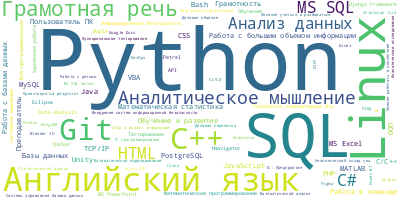

0it [00:00, ?it/s]


TypeError: ignored

In [ ]:
import os
import time
import json
import requests
from IPython.display import display, clear_output
import tqdm
import tqdm.notebook

import bs4
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import smtplib
from email.message import EmailMessage
import schedule
from natasha import Doc, MorphVocab, NewsEmbedding, NewsMorphTagger, Segmenter
from sklearn.feature_extraction.text import TfidfVectorizer


# Код 1-го дня: загрузка данных из интернета

def dump_json(obj, filename):
    """Функция сохранения JSON-файла на диск"""
    with open(filename, 'w', encoding='UTF-8') as f:
        json.dump(obj, f, ensure_ascii=False, indent=4)


def get_vacancies(text="python", 
                  experience=None, employment=None, schedule=None):
    """Функция для скачивания данных по API HeadHunter"""
    params = {
            "per_page": 100,
            "page": 0,
            "period": 30,
            "text": 'python',
            "experience": experience,
            "employment": employment,
            "schedule": schedule,
        }

    res = requests.get("https://api.hh.ru/vacancies", params=params)
    if not res.ok:
        print('Error:', res)
    vacancies = res.json()["items"]
    pages = res.json()['pages']

    for page in tqdm.trange(1, pages):
        params['page'] = page
        res = requests.get("https://api.hh.ru/vacancies", params=params)
        if res.ok:
            response_json = res.json()
            vacancies.extend(response_json["items"])
        else:
            print(res)
    
    dump_json(vacancies, 'vacancies.json')

    return vacancies


def get_full_descriptions(vacancies):
    """Функция для скачивания полного описания вакансий (работает 20 минут!)"""
    vacancies_full = []
    for entry in tqdm.tqdm(vacancies):
        vacancy_id = entry['id']
        description = requests.get(f"https://api.hh.ru/vacancies/{vacancy_id}")
        vacancies_full.append(description.json())
        print(description.json())
        time.sleep(0.2) # Этот таймаут нужен, чтобы hh не начал запрашивать капчу
        clear_output()

    dump_json(vacancies_full, 'vacancies_full.json')

    return vacancies_full


def load_from_google_drive(file_id, filename):
    """Функция для загрузки уже скаченного файла вместо get_full_descriptions"""
    url = f"https://drive.google.com/uc?export=view&id={file_id}"
    res = requests.get(url)
    data = res.json()
    dump_json(data, filename)
    return data


# Код 2-го дня: Data Mining - выделение ключевых слов

def preprocess(text):
    """Функция для предварительной обработки текста одной вакансии:
    '<p><strong>Кого мы ищем:</strong><br/>Junior Backend разработчика, готового работать в команде.</p> <p><strong>'
     ↓ ↓ ↓
    'искать junior backend разработчик готовый работать команда'
    """
    parsed_html = bs4.BeautifulSoup(text)
    text = parsed_html.text # удалили тэги
    
    morph_vocab = MorphVocab()
    segmenter = Segmenter()
    embedding = NewsEmbedding()
    morph_tagger = NewsMorphTagger(embedding)
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    words = []

    for token in doc.tokens:
        # Если часть речи не входит в список: [знак пунктуации, предлог, союз, местоимение], выполняем:
        if token.pos not in ['PUNCT', 'ADP', 'CCONJ', 'PRON']:  
            # Преобразуем к нормальной форме 'способов' -> 'способ'
            token.lemmatize(morph_vocab)
            # Добавляем в общий список 
            words.append(token.lemma)

    # Объединяем список элементов в одну строку через пробел
    # ['обязанность', 'писать',  'код'] -> 'обязанность писать код'
    line = ' '.join(words)

    return line


def preprocess_all(document_collection):
    """Функция для обработки всех вакансий. На вход функция получает список с описаниями.
    Работает до получаса!
    """
    preprocessed = []
    for vacancy in tqdm.tqdm(preprocess_all):
        preprocessed.append(preprocess(vacancy))

    dump_json(preprocessed, 'preprocessed.json')

    return preprocessed


def get_tf_idf_weights(preprocessed):
    """Эта функция получает на вход подготовленные тексты вида 
    'искать junior backend разработчик готовый работать команда'
    и составляет по ним словарь весов ключевых слов: 
    {'искать': 0.54, 'junior': 0.73, ...}
    """
    vectorizer = TfidfVectorizer(ngram_range=(1, 2))
    #  Обучаем объект векторизатора (функции, кодирующий текст в виде последовательностей чисел)
    vectorizer.fit(preprocessed)

    tf_idf_words = vectorizer.get_feature_names_out()
    tf_idf_table = vectorizer.transform(preprocessed).toarray()
    weights = tf_idf_table.sum(axis=0)
    indices_order = weights.argsort()[::-1]

    tf_idf_words[indices_order]

    frequencies = dict(zip(tf_idf_words, weights))

    return frequencies

# Код 3-го дня: автоматизация email-рассылки по расписанию

def generate_digest(text="python", experience=None, 
                    employment=None, schedule=None,
                    load_presaved=False):
    """Эта функция объединяет в себе все предыдущие и с нуля генерирует все нужные 
    для отправки email файлы. 
    Если параметр load_presaved=True, остальные параметры будут проигнорированы и
    загрузится предсохраненная версия с диска.
    """
    if load_presaved:
        vacancies_full = load_from_google_drive(
            '1d2NfxfM2n48m5WS6oCCc3rcQ4hdnTQ1v', 'vacancies_full.json')
    else:
        vacancies = get_vacancies(text, experience, employment, schedule)
        print('Загружено', len(vacancies), 'вакансий')
        vacancies_full = get_full_descriptions(vacancies)

    all_skills = []
    for vacancy in vacancies_full:
        for skill in vacancy['key_skills']:
            all_skills.append(skill['name'])

    frequencies = Counter(all_skills)

    pd.DataFrame(vacancies_full).to_excel('Подробное описание вакансий.xlsx')

    print('Топ навыков Python-разработчика:')
    cloud = WordCloud(background_color="white")
    wc_skills = cloud.generate_from_frequencies(frequencies).to_image()
    wc_skills.show()
    wc_skills.save('word_cloud_skills.png')

    vacancies_df = pd.DataFrame(vacancies_full)

    if load_presaved:
        preprocessed = load_from_google_drive(
            '14dcZnE_XvVeCgWCDgJSZiHgYJQm-TYvD', 'preprocessed.json')
    else:
        preprocessed = preprocess_all(vacancies_df['description'])
    
    frequencies = get_tf_idf_weights(preprocessed)

    print('\nКлючевые слова в описании вакансий:')
    cloud = WordCloud(background_color="white")
    wc_descriptions = cloud.generate_from_frequencies(frequencies).to_image()
    wc_descriptions.show()
    wc_descriptions.save('word_cloud_descriptions.png')


def send_email(to, sender, password):
    """Эта функция отправляет email"""
    msg = EmailMessage()
    msg['Subject'] = 'Тренды вакансий'
    msg['From'] = sender
    msg['To'] = to

    msg.set_content('Персональная подборка вакансий')

    # Вставляем HTML
    html_content = f'''
    Добрый день, дорогой подписчик!<br>
    <br>
    Присылаем дайджест с трендами в вакансиях для Python-разработчиков!<br>

    Основные навыки:<br>
    <img src="cid:0" style="width:200px"><br>
    <br>
    Самые популярные ключевые слова в описании вакансий:<br>

    <img src="cid:1" style="width:200px"><br>
    <br>
    Во вложениях&nbsp;&mdash; подробная информация о вакансиях.<br>
    <br>
    <br>
    С уважением,<br>
    Python-разработчик 🐍
    '''
    msg.add_alternative(html_content, subtype='html') 

    # Считываем файлы в бинарном виде и прикрепляем к письму

    with open('word_cloud_skills.png', 'rb') as f:
            file_data = f.read()
            msg.get_payload()[-1].add_related(
                file_data, 'word_cloud_skills.png', 'png', cid='<0>')

    with open('word_cloud_descriptions.png', 'rb') as f:
            file_data = f.read()
            msg.get_payload()[-1].add_related(
                file_data, 'word_cloud_descriptions.png', 'png', cid='<1>')

    with open('Подробное описание вакансий.xlsx', 'rb') as f:
            file_data = f.read()
            msg.add_attachment(
                file_data, maintype="application", 
                subtype="xlsx", filename='Подробное описание вакансий.xlsx')

    with smtplib.SMTP_SSL('smtp.yandex.ru', 465) as smtp:
        smtp.login(sender, password)
        smtp.send_message(msg)


# Прочитаем данные c логином и паролем из файла
cred_filename = 'credentials.json'

if os.path.exists(cred_filename):
    with open(cred_filename) as f:
        credentials = json.load(f)
else:
    raise FileNotFoundError(
        f'Файл с реквизитами к почтовому ящику {cred_filename} не найден,\n'
        'пожалуйста, воспользуйтесь инструкцией выше')


def job_send_digest():
    """Эта функция вызывает последовательно генерацию и отправку отчета. 
    Так как она запускается планировщиком по расписанию, она не должна иметь параметров.
    """
    # Вариант набора параметров (суммарно отрабатывает примерно 12 минут вместо 50)
    generate_digest(
        # Тут можно настроить параметры (не забудьте отключить load_presaved)
        text="python",
        experience='noExperience', 
        employment=['full', 'part'], 
        schedule=['fullDay', 'remote'],
        # Чтобы загружать новые данные по найденным параметрам, 
        # замените следующую строчку на load_presaved=False,
        # а чтобы получить предсохраненные данные - на load_presaved=True
        load_presaved=False
        )

    # Если хотим разослать одни и те же данные нескольким пользователям, нужно создать
    # список адресов и вызывать функцию send_email(to, ...) в цикле
    send_email(credentials['email'],
               credentials['email'], 
               credentials['password'])
    

schedule.clear()
schedule.every(1).day.do(job_send_digest)
schedule.run_all()


# Этот цикл будет повторяться бесконечно, пока ячейка не будет остановлена вручную
# (это вызовет KeyboardInterrupt - просто переходим к выполнению следующей ячейки)
while True:
    schedule.run_pending()
    time.sleep(1)